In [5]:
import numpy as np
import pymultinest

import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

import json

import corner

import retrieval_base.auxiliary_functions as af

def read_results(prefix, n_params, w_set='K2166'):

    # Set-up analyzer object
    analyzer = pymultinest.Analyzer(
        n_params=n_params, 
        outputfiles_basename=prefix
        )
    stats = analyzer.get_stats()

    # Load the equally-weighted posterior distribution
    posterior = analyzer.get_equal_weighted_posterior()
    posterior = posterior[:,:-1]

    # Read the parameters of the best-fitting model
    bestfit = np.array(stats['modes'][0]['maximum a posterior'])

    PT = af.pickle_load(prefix+'data/bestfit_PT.pkl')
    Chem = af.pickle_load(prefix+'data/bestfit_Chem.pkl')

    try:
        m_spec = af.pickle_load(prefix+f'data/bestfit_m_spec_{w_set}.pkl')
        d_spec = af.pickle_load(prefix+f'data/d_spec_{w_set}.pkl')
    
        LogLike = af.pickle_load(prefix+f'data/bestfit_LogLike_{w_set}.pkl')
    
        try:
            Cov = af.pickle_load(prefix+f'data/bestfit_Cov_{w_set}.pkl')
        except:
            Cov = None
    
        int_contr_em           = np.load(prefix+f'data/bestfit_int_contr_em_{w_set}.npy')
        int_contr_em_per_order = np.load(prefix+f'data/bestfit_int_contr_em_per_order_{w_set}.npy')
        int_opa_cloud          = np.load(prefix+f'data/bestfit_int_opa_cloud_{w_set}.npy')
    except:
        m_spec = af.pickle_load(prefix+f'data/bestfit_m_spec.pkl')
        d_spec = af.pickle_load(prefix+f'data/d_spec.pkl')
    
        LogLike = af.pickle_load(prefix+f'data/bestfit_LogLike.pkl')
    
        try:
            Cov = af.pickle_load(prefix+f'data/bestfit_Cov.pkl')
        except:
            Cov = None
    
        int_contr_em           = np.load(prefix+f'data/bestfit_int_contr_em.npy')
        int_contr_em_per_order = np.load(prefix+f'data/bestfit_int_contr_em_per_order.npy')
        int_opa_cloud          = np.load(prefix+f'data/bestfit_int_opa_cloud.npy')

    f = open(prefix+'data/bestfit.json')
    bestfit_params = json.load(f)
    f.close()

    return posterior, bestfit, PT, Chem, int_contr_em, int_contr_em_per_order, int_opa_cloud, m_spec, d_spec, LogLike, Cov, bestfit_params

In [2]:
prefix_J_A = './retrieval_outputs/test_J_A/test_'
w_set_J_A  = 'J1226'
d_spec_J_A = af.pickle_load(prefix_J_A+f'data/d_spec_{w_set_J_A}.pkl')

prefix_K_A = './retrieval_outputs/test_K_A/test_'
w_set_K_A  = 'K2166'
d_spec_K_A = af.pickle_load(prefix_K_A+f'data/d_spec_{w_set_K_A}.pkl')

prefix_J_B = './retrieval_outputs/test_J_B/test_'
w_set_J_B  = 'J1226'
d_spec_J_B = af.pickle_load(prefix_J_B+f'data/d_spec_{w_set_J_B}.pkl')

prefix_K_B = './retrieval_outputs/test_K_B/test_'
w_set_K_B  = 'K2166'
d_spec_K_B = af.pickle_load(prefix_K_B+f'data/d_spec_{w_set_K_B}.pkl')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


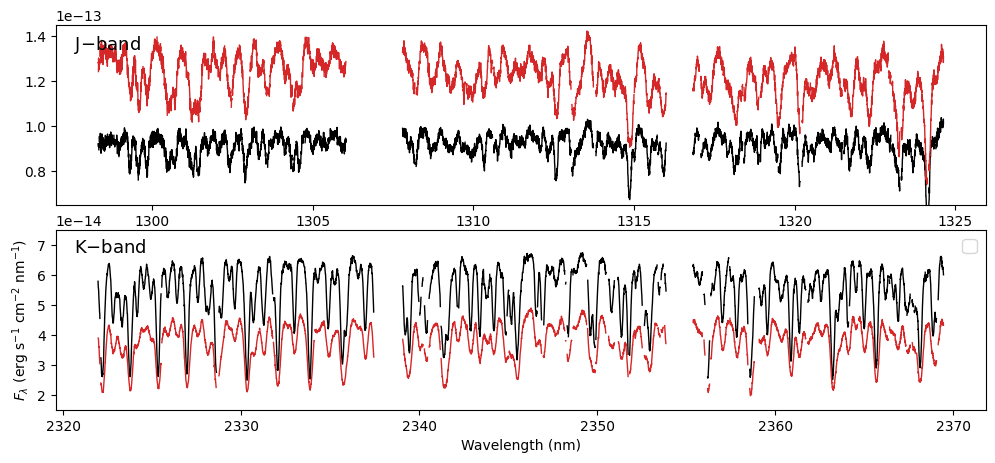

In [78]:
w_ratios = [
    (d_spec_J_A.wave.max()-d_spec_J_A.wave.min()) / (d_spec_K_A.wave.max()-d_spec_K_A.wave.min()), 1
]

fig, ax = plt.subplots(
    #figsize=(14,3), ncols=2, sharey=True, 
    #gridspec_kw={'wspace':0.03, 'width_ratios':w_ratios}
    figsize=(12,5), nrows=2, #sharey=True, 
    gridspec_kw={'hspace':0.14}
    )
for i in range(d_spec_J_A.n_orders):
    if i != 7:
        continue
    for j in range(d_spec_J_A.n_dets):
        ax[0].plot(d_spec_J_A.wave[i,j], d_spec_J_A.flux[i,j], c='k', lw=1)
        ax[0].plot(d_spec_J_B.wave[i,j], d_spec_J_B.flux[i,j], c='C3', lw=1)

for i in range(d_spec_K_A.n_orders):
    if i != 5:
        continue
    for j in range(d_spec_K_A.n_dets):
        labels = [None, None]
        if (i==0) and (j==0):
            labels = ['Luhman 16A', 'Luhman 16B']

        ax[1].plot(d_spec_K_A.wave[i,j], d_spec_K_A.flux[i,j], c='k', lw=1, label=labels[0])
        ax[1].plot(d_spec_K_B.wave[i,j], d_spec_K_B.flux[i,j], c='C3', lw=1, label=labels[1])

ax[0].annotate(r'J$-$band', xy=(0.02,0.95), xycoords='axes fraction', ha='left', va='top', fontsize=13)
ax[1].annotate(r'K$-$band', xy=(0.02,0.95), xycoords='axes fraction', ha='left', va='top', fontsize=13)
#plt.annotate()

ax[1].legend(loc='upper right', fontsize=13)
ax[0].set(
    #ylim=(0,1.5e-13), xlim=(d_spec_J_A.wave.min()-5, d_spec_J_A.wave.max()+5), 
    ylim=(0.65e-13,1.45e-13), 
    )
ax[1].set(
    #ylim=(0,1.5e-13), xlim=(d_spec_K_A.wave.min()-5, d_spec_K_A.wave.max()+5), 
    ylim=(0.15e-13,0.75e-13), 
    xlabel='Wavelength (nm)', ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )
#plt.savefig('./plots/Luhman_16AB_spec.pdf')
plt.savefig('./plots/Luhman_16AB_spec_zoom_in.pdf')
plt.show()

In [6]:
prefix = './retrieval_outputs/order_6_A_ret_1/test_'
w_set  = 'K2166'
n_params = 27

res = read_results(prefix=prefix, n_params=n_params, w_set=w_set)
posterior, bestfit, PT, Chem, _, _, _, m_spec, d_spec, LogLike, Cov, bestfit_params = res

  analysing data from ./retrieval_outputs/order_6_A_ret_1/test_.txt


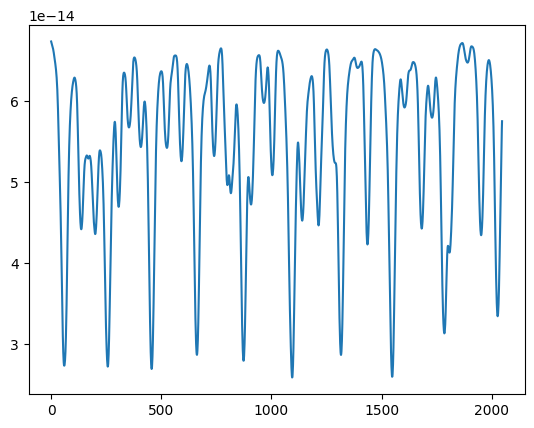

In [7]:
plt.plot(m_spec.flux[0,0])
plt.show()

In [31]:
from petitRADTRANS import Radtrans

atm = Radtrans(
    line_species=['HF_main_iso'], 
    mode='lbl', lbl_opacity_sampling=1, 
    wlen_bords_micron=[2.3,2.4]
    )

wave_micron, opa = atm.plot_opas(
    ['HF_main_iso'], temperature=1200, pressure_bar=1, return_opacities=True
    )['HF_main_iso']

/home/sam/Documents/PhD/petitRADTRANS/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of HF_main_iso...



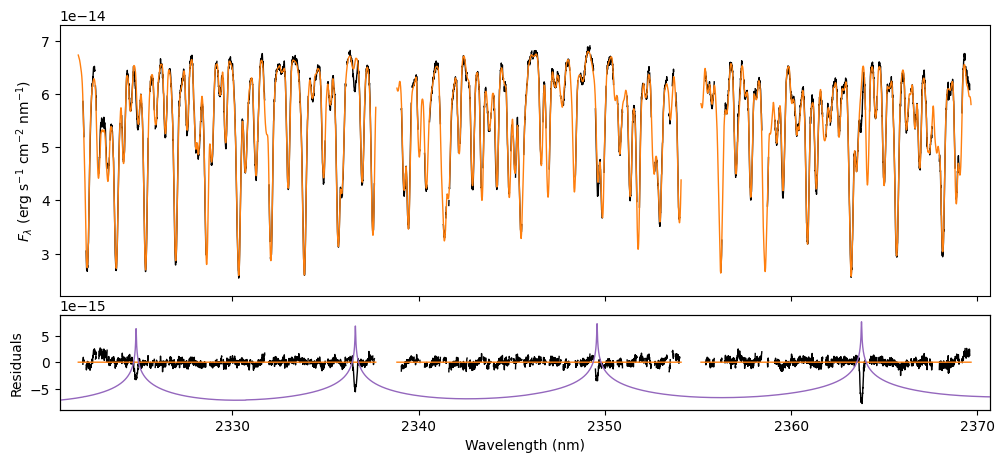

In [53]:
h_ratios = [1,0.35]
fig, ax = plt.subplots(
    figsize=(12,5), nrows=2, sharex=True, 
    gridspec_kw={'hspace':0.1, 'height_ratios':h_ratios}
    )

for i in range(d_spec.n_orders):
    for j in range(d_spec.n_dets):

        ax[0].plot(d_spec.wave[i,j], d_spec.flux[i,j], c='k', lw=1)
        ax[0].plot(d_spec.wave[i,j], LogLike.f[i,j]*m_spec.flux[i,j], c='C1', lw=1)

        ax[1].plot(d_spec.wave[i,j], d_spec.flux[i,j]-LogLike.f[i,j]*m_spec.flux[i,j], c='k', lw=1)
        ax[1].plot(d_spec.wave[i,j], 0*m_spec.flux[i,j], c='C1', lw=1)

ax_opa = ax[1].twinx()
ax_opa.plot(wave_micron*1e3 * (1+bestfit_params['params']['rv']/3e5), opa*20*1.66054e-24, c='C4', lw=1)
ax_opa.set(yscale='log', yticks=[])

ax[0].set(
    xlim=(d_spec.wave.min()-1, d_spec.wave.max()+1), 
    ylim=(0.22e-13,0.73e-13), 
    ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$'
    )
print()

ax[1].set(
    xlabel='Wavelength (nm)', ylabel='Residuals', 
    ylim=np.diff(list(ax[0].get_ylim()))/2 * np.array([-1,1]) * h_ratios[1]/h_ratios[0]
    )
#plt.savefig('./plots/Luhman_16AB_spec.pdf')
#plt.savefig('./plots/Luhman_16AB_spec_zoom_in.pdf')
plt.savefig('./plots/Luhman_16A_HF_residuals.pdf')
plt.show()